In [ ]:
  #python package
import pandas as pd
import numpy as np
#importing the required file
train_def= pd.read_csv("./kddcup.csv", index_col=0)

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
data=pd.DataFrame(train_def)
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.head()


,Protocol,Service,Flag,src_bytes,dst_bytes,Land,Wrong_fragment,Urgent,Hot,num_failed_logins,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
Duration,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,162,4528,0,0,0,0,0,...,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0
0,0,1,0,236,1228,0,0,0,0,0,...,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0
0,0,1,0,233,2032,0,0,0,0,0,...,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0
0,0,1,0,239,486,0,0,0,0,0,...,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0
0,0,1,0,238,1282,0,0,0,0,0,...,5,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.shape

(1048575, 40)

In [ ]:

!pip install -U scikit-multiflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
categorical = [var for var in data.columns if data[var].dtype=='O']
data[categorical].head()
# data[categorical].isnull().mean()
numerical = [var for var in data.columns if data[var].dtype!='O']
data[numerical].head()
real_data=pd.DataFrame()
real_data["Serv1"]=data["Service_1"]
real_data["Serv2"]=data["Service_2"]
real_data["Serv3"]=data["Service_3"]

In [ ]:
!pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import category_encoders as encode
col=["Service","Flag"]
encoder = encode.OneHotEncoder(cols=col)
data = encoder.fit_transform(data)

In [ ]:
categorical = [var for var in data.columns if data[var].dtype=='O']
data[categorical].head()
data.size

123731850

In [ ]:
!pip install scikit-multiflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from skmultiflow.data import DataStream
from skmultiflow.data import WaveformGenerator
from skmultiflow.trees import HoeffdingTree
from skmultiflow.evaluation import EvaluatePrequential
ht = HoeffdingTree(max_byte_size=33554432,
memory_estimate_period=1000000,
grace_period=200,
split_criterion='info_gain',
split_confidence=1e-07,
tie_threshold=0.05,
binary_split=True,
stop_mem_management=False,
remove_poor_atts=False,
no_preprune=False,
leaf_prediction='nba',
nb_threshold=0,
nominal_attributes=None)
def CreateNewBaseClassifier(r):
  global ht
  # stream = WaveformGenerator()
  # stream.get_params()
  y=np.array(data["Protocol"])
  # print(ht.get_model_description())
  stream=DataStream(data=real_data,allow_nan=True,y=y,name="data")
  stream.prepare_for_use()
  n_samples = 0
  uncertain=1
  crt=0
  max_samples = 100
  while n_samples < max_samples and stream.has_more_samples():
      X, Y = stream.next_sample()
      # print(X,y)
      y_pred = ht.predict(X)
      # print(y[0],y_pred[0])
      if y[0] == y_pred[0]:
          uncertain*=(1-n_samples)
          crt+=1
      else:
        ht = ht.partial_fit(real_data, y,sample_weight=uncertain)
        # print("Model Score",ht.score(real_data, np.array(data["Protocol"])))
      n_samples += 1
  # # stream.get_params()
  # stream.set_params(params={"data":""})
  # val=ht.get_votes_for_instance(X)
  # print(val)

  # print('accuracy: {}'.format(crt / n_samples))
  c_new=[X,y_pred]
  return c_new


/usr/local/lib/python3.8/dist-packages/skmultiflow/trees/hoeffding_tree.py:34: FutureWarning: 'HoeffdingTree' has been renamed to 'HoeffdingTreeClassifier' in v0.5.0.
The old name will be removed in v0.7.0
  warnings.warn("'HoeffdingTree' has been renamed to 'HoeffdingTreeClassifier' in v0.5.0.\n"


In [ ]:

global theta_m
total_values=[1000,1000,1000,1000,1000,1000,1000,1000]
def UncertaintyStrategy(x,s):
  result=ht.predict_proba(x)
  result[0].sort()
  len1=len(result[0])
  margin=abs(result[0][len1-1]-result[0][len1-2])
  if(margin<theta_m):
    theta_m=theta_m*(1-s)
    return True
  else:
    return False

In [ ]:
def ImbalanceStratagy(sigma):
 # sigma : threshold used foe random strategy
 # generate a uniform random variable between [0,1]
 c=np.random.uniform(0,1)
 if(c<=sigma):
  return True
 else:
  return False

In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sys
import os
sys.path.append(os.path.abspath("./"))

In [ ]:

import numpy as np
from math import sqrt, log


def imbalance_degree(classes, distance="EU"):


    def _eu(_d, _e):
       
        summ = np.vectorize(lambda p : pow(p - _e, 2))(_d).sum()
        return sqrt(summ)
        
    def _ch(_d, _e):

        dif = np.vectorize(lambda p : abs(p - _e))(_d)
        return dif.max()
    
    def _kl(_d, _e):

        kl = lambda p : 0.0 if p == 0 else p * log(p/_e)
        return np.vectorize(kl)(_d).sum()
    
    def _he(_d, _e):

        summ = np.vectorize(lambda p : pow((sqrt(p) - sqrt(_e)), 2))(_d).sum()
        return (1 / sqrt(2)) * sqrt(summ)
    
    def _tv(_d, _e):

        summ = np.vectorize(lambda p : abs(p - _e))(_d).sum()
        return (1 / 2) * summ
    
    def _cs(_d, _e):

        summ = np.vectorize(lambda p : pow((p - _e), 2) / _e)(_d).sum()
        return summ
    
    def _min_classes(_d, _e):

        return len(_d[_d < _e])
    
    def _i_m(_K, _m):

        min_i = np.zeros(_m)
        maj_i = np.ones((_K - _m - 1)) * (1 / _K)
        maj = np.array([1 - (_K - _m - 1) / _K])
        return np.concatenate((min_i, maj_i, maj)).tolist()
    
    def _dist_fn():

        if distance == "EU":
            return _eu
        elif distance == "CH":
            return _ch
        elif distance == "KL":
            return _kl
        elif distance == "HE":
            return _he
        elif distance == "TV":
            return _tv
        elif distance == "CS":
            return _cs
        else:
            raise ValueError("Bad distance function parameter. " + \
                    "Should be one in EU, CH, KL, HE, TV, or CS")
    
    _, class_counts = np.unique(classes, return_counts=True)
    empirical_distribution = class_counts / class_counts.sum()
    K = len(class_counts)
    e = 1 / K
    m = _min_classes(empirical_distribution, e)
    i_m = _i_m(K, m)
    dfn = _dist_fn()
    dist_ed = dfn(empirical_distribution, e)
    return 0.0 if dist_ed == 00 else (dist_ed / dfn(i_m, e)) + (m - 1)

In [ ]:

"""
ReinforcementWeightAdjustment (x,y,L,D,
wd
,DCIR[l])
Inputs:
1: x: the processed instance of label y
2: L: number of classes
3: D: number of the dynamic classifiers
4: wd
: weight of Dynamic classifiers ðd ¼ 1; ... ; DÞ
5: DCIR½l: damped class imbalance ratio
Output: Adjusted weight wd ðd ¼ 1; ... ; DÞ
Process:
1: if ðDCIR½y < 1=LÞ then // if x belongs to minority class
2: for d in 1 to D do:
3: if ðPredictresultðx; CdÞ¼¼ True) then // Cd predicts
correct
4: wd ¼ wd  ð1 þ 1=DÞ // increase weight of Cd
5: else
6: wd ¼ wd  ð1  1=DÞ // decrease weight of Cd
7: end if
"""
"""
 
"""
# ht = HoeffdingTree(max_byte_size=33554432,
#   memory_estimate_period=1000000,
#   grace_period=200,
#   split_criterion='info_gain',
#   split_confidence=1e-07,
#   tie_threshold=0.05,
#   binary_split=True,
#   stop_mem_management=False,
#   remove_poor_atts=False,
#   no_preprune=False,
#   leaf_prediction='nba',
#   nb_threshold=0,
#   nominal_attributes=None)
# global ht
def ReinforcementWeightAdjustment(ht):
  y=np.array(data["Protocol"])
  val=imbalance_degree(y, "EU")
  print(val)
  stream=DataStream(data=real_data,allow_nan=True,y=y,name="data")
  stream.prepare_for_use()
  weigth=1.00
  weight_arr=list()
  if(val>round(1/len(y))): # < symbol has no 
    for i in range(len(y)):
      X, Y = stream.next_sample()
      if Y[0] == ht.predict(X):
        weigth*=(1+1/real_data.size)
      else:
        weigth*=(1-1/real_data.size)
      weight_arr.append(weigth)
  print(real_data.shape,len(weight_arr))
  print(weight)
  ht = ht.partial_fit(real_data, np.array(data["Protocol"]),sample_weight=weigth)
  print("Model Score",ht.score(real_data, np.array(data["Protocol"])))

In [ ]:
def fitnessfunc(inst_pos):
 return inst_pos[0]**2 + inst_pos[1]**2 + 1


In [ ]:
# import random
# R=[]
# I=10
# def CreateNewBaseClassifier(r):
# # r : tiny portion parameter to select and label instances from A
#   global ht
#   size=int(r*I) # number of instances to select on random
#   AA=[[]for h in range(I)]
#   for h in range(I):
#     AA[h]=[A.data[h],B.data[h]]
#   W = 0.5
#   c1 = 0.1
#   c2 = 0.9
#   n_iter = 1
#   stream_inst = AA
#   velocity_arr = ([np.array([0, 0]) for _ in range(I)])
#   iteration = 0
#   #pbest
#   pbest_pos = stream_inst
#   pbest_fitness = np.array([float('inf') for _ in range(I)])
#   #gbest
#   gbest_pos = np.array([float('inf'), float('inf')])
#   gbest_fitness = float('inf')
#   for collect in range(size):
#     while iteration < n_iter:
#       for i in range(I):
#         fit_value = fitnessfunc(stream_inst[i])

#         if(pbest_fitness[i] > fit_value):
#           pbest_fitness[i] = fit_value
#           pbest_pos[i] = stream_inst[i]

#         if(gbest_fitness > fit_value):
#           gbest_fitness = fit_value
#           gbest_pos = stream_inst[i]

#       for i in range(I):
#         new_velocity = (W*velocity_arr[i]) + (c1*random.random()) * (pbest_pos[i] - stream_inst[i]) + (c2*random.random()) * (gbest_pos-stream_inst[i])
#         new_position = new_velocity + stream_inst[i]
#         stream_inst[i] = new_position
#       iteration = iteration + 1

#   # print("The best position is ", gbest_pos, "in iteration number ", iteration)
#       R.append(gbest_pos)
#   # randomly labeled r portion of instances from current array A
#   # R=random.sample(AA,size)
#   R1=[None]*size
#   R2=[None]*size
#   for h in range(size):
#     R1[h]=R[h][0][0]
#     R2[h]=R[h][1][0]
#   R1=np.asarray(R1)
#   R2=np.asarray(R2)
#   # building a new classifier cnew from R
#   ht=ht.partial_fit(R1,R2)
#   # updating the classifier with R
#   z=ht.predict(R1)
#   cnew=[R1,z]
#   return cnew

In [ ]:
###
### Ensemble

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
params_rf = {'n_estimators': [50, 100, 200]}
rf_gs = GridSearchCV(rf, params_rf, cv=5)
y=np.array(data["Protocol"])
rf_gs.fit(real_data, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 200]})

In [ ]:
"""
Algorithm 6. DealInstance ðxnew; i; 6; um; s; UÞ
Input:
1: xnew: new instance
2: i: indicator of the current processing instance’s position in
circular array
3: 6: the set of imbalance threshold sl ðl ¼ 1; ... ; Lsl6Þ
4: u: parameter to set margin threshold
5: s: the adjustment step
6: U: the labeled instances buffer
Process:
1: Instance xi ¼ A[i] // determine the instance to be processed
from the circular array
2: labeling ¼ UncertaintyStrategy (xi,um,s)
3: if (labeling ¼ ¼ True) then
4: get the real label yi of instance xi, update Cd, Cs with
labeled xi
5: store xi into U[yi]
6: if (Predictresult(xi, E) ¼ ¼ True) then // if the ensemble
classifier E predict correct
7: um ¼ um  ð1  sÞ
8: end if
9: else
10: labeling ¼ ImbalanceStrategy (xi, 6)
11: if (labeling ¼ ¼ True) then
12: get the real label yi of instance xi, update Cd, Cs with
labeled xi
13: store xi into U[yi]
14: if (Predictresult(xi, E) ¼ False) then //E predict wrong
15: ReinforcementWeightAdjustment(xi,yi,L,D,wd
,DCIR[l])
16: end if
17: end if
18: end if
19: A[i] ¼ xnew // cache new instance in A[i] to replace xi
"""

labels=np.array(data["Protocol"])
def DealtInstace(i,x,theta_m,ht):
  weights=list()
  Instance=labels[i]
  ## Uncertain strategy
  result=ht.predict_proba(x)
  result[0].sort()
  len1=len(result[0])
  margin=abs(result[0][len1-1]-result[0][len1-2])
  if(margin<theta_m):
    theta_m=theta_m*(1-i)
    weights.append(labels[i])
    ht = ht.partial_fit(real_data, np.array(data["Protocol"]),sample_weight=weights)
    # print(ht.nominal_attributes)
    # print("Model Score",ht.score(real/_data["Serv1"], np.array(data["Protocol"])))
  else:
    #inbalance strattagy
    c=np.random.uniform(0,1)
    if(c<=theta_m):
      weights.append(labels[i])
      if rf.predict(x)!=labels[i]:
        ReinforcementWeightAdjustment()

In [ ]:
from skmultiflow.data import HyperplaneGenerator
from skmultiflow.data import SEAGenerator
from skmultiflow.data import RandomRBFGeneratorDrift
from skmultiflow.data import RandomTreeGenerator
from skmultiflow.data import LEDGeneratorDrift
from skmultiflow.trees import HoeffdingTree
from skmultiflow.data import AGRAWALGenerator
from skmultiflow.evaluation import EvaluatePrequential
from skmultiflow.data.sine_generator import SineGenerator

hyp_s=HyperplaneGenerator(random_state=None, n_features=10,
n_drift_features=2, mag_change=0.001, noise_percentage=0.05, sigma_percentage=0.1)   

hyp_f=HyperplaneGenerator(random_state=None,
n_features=10,
n_drift_features=2,
mag_change=0.1,
noise_percentage=0.05,
sigma_percentage=0.1)
    
sea_s=SEAGenerator(classification_function=0,
random_state=None,
balance_classes=False,
noise_percentage=0.10)
    
sea_f=SEAGenerator(classification_function=0,
random_state=None,
balance_classes=False,
noise_percentage=0.10)
    
rbf_gr=RandomRBFGeneratorDrift(model_random_state=None,
sample_random_state=None,
n_classes=4,
n_features=20,
n_centroids=4,
change_speed=0.0,
num_drift_centroids=4)
    
led_m=LEDGeneratorDrift(random_state=None,
noise_percentage=0.10,
has_noise=False,
n_drift_features=3)
    
tree_s=RandomTreeGenerator(tree_random_state=None,
sample_random_state=None,
n_classes=4,
n_cat_features=5,
n_num_features=5,
n_categories_per_cat_feature=5,
max_tree_depth=5,
min_leaf_depth=3,
fraction_leaves_per_level=0.15)
    
tree_f=RandomTreeGenerator(tree_random_state=None,
sample_random_state=None,
n_classes=6,
n_cat_features=5,
n_num_features=5,
n_categories_per_cat_feature=5,
max_tree_depth=5,
min_leaf_depth=3,
fraction_leaves_per_level=0.15)

sine=SineGenerator(classification_function = 2, random_state = 112,
 balance_classes = False, has_noise = True)

agar=AGRAWALGenerator(balance_classes=True,random_state=2)

ds_stream=DataStream(data=real_data,allow_nan=True,y=y,name="data")

In [ ]:
"""
Online Active Learning Procedure of
ROALE-DI

: while (S. hasNext()) do
2: xnew ¼ S. nextInstance()
3: p ¼ p þ 1
4: if (p<I) then // before array fully filled the first time.
5: A½p  1 ¼ xnew
6: else if (p ¼ ¼ I) then // fill the array for the first time.
7: A½p  1 ¼ xnew
8: Cs ¼ CreateNewBaseClassifierð1; U; um; I; L; D; wd; DCIR½lÞ
// label all instances in the first block to create stable
classifier
9: C1 ¼ Cs// create the first dynamic classifier
10: else // (p>I) have more instances than I
11: i ¼ ðp  1Þ%I// current index for A
12: DealInstanceðxnew; i; 6; um; s; UÞ // address instance
13: i ¼ ði þ 1Þ%I // i moves circularly
14: if (i ¼ ¼ 0) then // the array is filled again
15: k ¼ k þ 1
16: um ¼ u  2=L // reset um for UncertaintyStrategy
17: Cnew ¼ CreateNewBaseClassifierð"; U; um; I; L; D; wd; DCIR½lÞ
// create a new dynamic classifier
18: if(k>D) then
19: Cmin Cnew
20: end if
21: Update weights according to (3)
22: Use (5) calculate the damped class imbalance ratio
23: end if
24: end if
25: end while
26: for i ¼ 0 to I-1 do // address the remaining instances in the
array
27: x ¼ A½i
28: DealInstanceðx; i; 6; um; s; UÞ
29: end for
"""
from imblearn.over_sampling import SMOTE
from sklearn import metrics
gen=[hyp_s,hyp_f,sea_s,sea_f,rbf_gr,led_m,tree_s,tree_f,ds_stream,agar,ds_stream] 

class CircularArray:
 def __init__(self, size):
  self.data = [None for i in range(size)]
 def append(self, x):
  self.data.pop(0)
  self.data.append(x)
 def get(self):
  return self.data
 def set(self,pos,x):
   self.data[pos]=x

p,i,k,g=0,0,0,0
sigma=0.01               # random strategy threshold parameter
s=0.10 
r=0.05         
I=500               
D=2         
L=500
theta=0.1                   # uncertainty strategy initial threshold setting parameter
theta_m=theta*(2/L)      
C=[[]for l in range(D)]  
W=[1.0]*D         
cir=CircularArray(600)
threshold= 1
labels=np.array(data["Protocol"])
stream=gen[g]
stream.prepare_for_use()
n_samp=1
while(stream.has_more_samples() and n_samp<100):
  X, Y = stream.next_sample()
  p+=1
  n_samp+=1
  CreateNewBaseClassifier(0.05)
  fpr, tpr, thresholds = metrics.roc_curve(real_data["Serv1"], np.array(data["Protocol"]), pos_label=2)
  print(fpr, thresholds)
  # pred=ht.get_votes_for_instance(real_data)
  # print(pred)
  if p<Y:
    cir.set(p-1,X)
  elif p==Y:
    cir.set(p-1,X)
  else:
    i=(p-1)%Y
    DealtInstace(i,X,threshold,ht)
    i=i+1%Y
    if i==0:
      k=(k+1)%D
      C[k]=CreateNewBaseClassifier(r)
      theta_m=theta*(2/L)
      if(k>D):
        for d in range(D-1):
          C[d]=C[d+1]
          C[D-1]=C[k]
        for d in range(D-1):
          W[d]= W[d]*(1-(1/D))
          W[D-1]=1/D
        for b in range(I-1):
          xp=cir.data[b]
          DealtInstace(X,b,sigma,theta_m,s)
      threshold=threshold*2/600
      result=ht.predict_proba(X)
      result[0].sort()
      len1=len(result[0])
      margin=abs(result[0][len1-1]-result[0][len1-2])
      # print("Margin value:",margin)
      # if(margin<threshold):
      #   threshold=threshold*(1-p)
      #   ht=ht.partial_fit(real_data, np.array(data["Protocol"]))
        # print("Model Score",ht.score(real_data, np.array(data["Protocol"])))

/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_fo

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No pos

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No pos

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedM

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedM

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedM

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedM

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedM

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedM

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedM

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedM

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedM

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedM

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed 

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed 

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed 

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: div

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed 

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: div

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed 

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: div

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: div

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: div

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: div

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed 

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed 

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed 

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed 

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed 

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(


[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No pos

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedM

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed 

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedM

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_fo

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed 

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed 

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed 

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed 

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed 

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(


[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-82-5cb4b4e3d316>:85: RuntimeWarning: divide by zero encountered in remainder
  i=(p-1)%Y
<ipython-input-82-5cb4b4e3d316>:87: RuntimeWarning: divide by zero encountered in remainder
  i=i+1%Y
/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed 

[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]
[0.         0.22866652 0.26347185 1.        ] [3 2 1 0]


/usr/local/lib/python3.8/dist-packages/skmultiflow/data/base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(


In [ ]:
acc_list=['hyp_s.txt','hyp_f.txt','sea_s.txt','sea_f.txt','rbf_gr.txt',
'led_m.txt','tree_s.txt','tree_f.txt','data_stream.txt','sine.txt','agar.txt']
for g in range(0,len(gen)):
  evaluator=EvaluatePrequential(n_wait=1,
  max_samples=1000,
  batch_size=1,
  pretrain_size=0,
  metrics=['accuracy'],
  output_file=acc_list[g],
  show_plot=False,
  restart_stream=True,
  data_points_for_classification=False)
  evaluator.evaluate(stream=stream, model=ht, model_names=['HT'])



Prequential Evaluation
Evaluating 1 target(s).
Evaluating...
 #################### [100%] [0.40s]
Processed samples: 1000
Mean performance:
HT - Accuracy     : 0.7800
Prequential Evaluation
Evaluating 1 target(s).
Evaluating...
 #################### [100%] [0.45s]
Processed samples: 1000
Mean performance:
HT - Accuracy     : 0.8090
Prequential Evaluation
Evaluating 1 target(s).
Evaluating...
 #################### [100%] [0.45s]
Processed samples: 1000
Mean performance:
HT - Accuracy     : 0.7610
Prequential Evaluation
Evaluating 1 target(s).
Evaluating...
 #################### [100%] [0.42s]
Processed samples: 1000
Mean performance:
HT - Accuracy     : 0.7460
Prequential Evaluation
Evaluating 1 target(s).
Evaluating...
 #################### [100%] [0.40s]
Processed samples: 1000
Mean performance:
HT - Accuracy     : 0.7980
Prequential Evaluation
Evaluating 1 target(s).
Evaluating...
 #################### [100%] [0.43s]
Processed samples: 1000
Mean performance:
HT - Accuracy     : 0.786

<ipython-input-84-eddc9824f38d>:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  macc=np.array(macc).astype(np.float)
<ipython-input-84-eddc9824f38d>:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  samples=np.array(samples).astype(np.float)
<ipython-input-84-eddc9824f38d>:15: DeprecationWarning: `np.float` is a deprecated alias for the

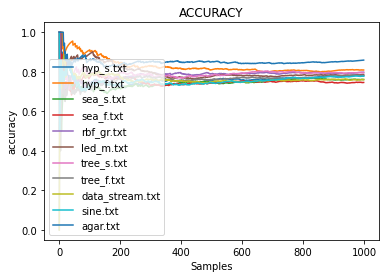

In [ ]:
import matplotlib.pyplot as plt
for g in range(11):
  plt.title('ACCURACY')
  plt.xlabel('Samples')
  plt.ylabel('accuracy')
  f=open(acc_list[g], "r")
  macc=[]
  samples=[]
  for line in f:
    cline=line
    if(cline[0].isdigit()):
      col=line.split(',')									
      samples.append(col[0])
      macc.append(col[1])	
  macc=np.array(macc).astype(np.float)
  samples=np.array(samples).astype(np.float)
  plt.plot(samples,macc,label=acc_list[g])
  plt.legend()


In [ ]:
"""
Online Active Learning Procedure of
ROALE-DI

: while (S. hasNext()) do
2: xnew ¼ S. nextInstance()
3: p ¼ p þ 1
4: if (p<I) then // before array fully filled the first time.
5: A½p  1 ¼ xnew
6: else if (p ¼ ¼ I) then // fill the array for the first time.
7: A½p  1 ¼ xnew
8: Cs ¼ CreateNewBaseClassifierð1; U; um; I; L; D; wd; DCIR½lÞ
// label all instances in the first block to create stable
classifier
9: C1 ¼ Cs// create the first dynamic classifier
10: else // (p>I) have more instances than I
11: i ¼ ðp  1Þ%I// current index for A
12: DealInstanceðxnew; i; 6; um; s; UÞ // address instance
13: i ¼ ði þ 1Þ%I // i moves circularly
14: if (i ¼ ¼ 0) then // the array is filled again
15: k ¼ k þ 1
16: um ¼ u  2=L // reset um for UncertaintyStrategy
17: Cnew ¼ CreateNewBaseClassifierð"; U; um; I; L; D; wd; DCIR½lÞ
// create a new dynamic classifier
18: if(k>D) then
19: Cmin Cnew
20: end if
21: Update weights according to (3)
22: Use (5) calculate the damped class imbalance ratio
23: end if
24: end if
25: end while
26: for i ¼ 0 to I-1 do // address the remaining instances in the
array
27: x ¼ A½i
28: DealInstanceðx; i; 6; um; s; UÞ
29: end for
"""
from imblearn.over_sampling import SMOTE
from sklearn import metrics
gen=[hyp_s,hyp_f,sea_s,sea_f,rbf_gr,led_m,tree_s,tree_f,ds_stream,agar,ds_stream] 

class CircularArray:
 def __init__(self, size):
  self.data = [None for i in range(size)]
 def append(self, x):
  self.data.pop(0)
  self.data.append(x)
 def get(self):
  return self.data
 def set(self,pos,x):
   self.data[pos]=x

p,i,k,g=0,0,0,0
cir=CircularArray(600)
threshold= 1
labels=np.array(data["Protocol"])
stream=gen[g]
stream.prepare_for_use()
n_samp=1
while(stream.has_more_samples() and n_samp<100):
  X, Y = stream.next_sample()
  p+=1
  n_samp+=1
  CreateNewBaseClassifier(0.05)
  fpr, tpr, thresholds = metrics.roc_curve(real_data["Serv1"], np.array(data["Protocol"]), pos_label=2)
  print(fpr, thresholds)
  # pred=ht.get_votes_for_instance(real_data)
  # print(pred)
  if p<Y:
    cir.set(p-1,X)
  elif p==Y:
    cir.set(p-1,X)
  else:
    i=(p-1)%Y
    DealtInstace(i,X,threshold,ht)
    i=i+1%Y
    if i==0:
      k+=1
      threshold=threshold*2/600
      result=ht.predict_proba(X)
      result[0].sort()
      len1=len(result[0])
      margin=abs(result[0][len1-1]-result[0][len1-2])
      # print("Margin value:",margin)
      if(margin<threshold):
        threshold=threshold*(1-p)
        ht=ht.partial_fit(real_data, np.array(data["Protocol"]),sample_weight=[threshold])
        # print("Model Score",ht.score(real_data, np.array(data["Protocol"])))